## Case Study 1(Cervical Cancer Risk Classification)    
    
   
    Age
    Number of sexual partners
    First sexual intercourse
    Num of pregnancies
    Smokes
    Smokes (years)
    Smokes (packs/year)
    Hormonal Contraceptives
    Hormonal Contraceptives (years)
    IUD
    IUD (years)
    STDs
    STDs (number)
    STDs:condylomatosis
    STDs:cervical condylomatosis
    STDs:vaginal condylomatosis
    STDs:vulvo-perineal condylomatosis
    STDs:syphilis
    STDs:pelvic inflammatory disease
    STDs:genital herpes
    STDs:molluscum contagiosum
    STDs:AIDS
    STDs:HIV
    STDs:Hepatitis B
    STDs:HPV
    STDs: Number of diagnosis
    STDs: Time since first diagnosis
    STDs: Time since last diagnosis
    Dx:Cancer
    Dx:CIN
    Dx:HPV
    Dx
    Hinselmann
    Schiller
    Citology
    Biopsy

### 1.1 import some necessary librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

### 1.2 import and put the train and test datasets in  pandas dataframe

In [2]:
df = pd.read_csv('./cervicalcancer.csv')
print(df.shape,'\n\n')
df.head()

(858, 36) 




,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

### 1.3 check the data.describe()

In [4]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1.4 Replacing ;?' with null values in each column?


In [5]:
df.replace('?',np.NaN,inplace=True)

### 1.5 Check count of 0 means not cancer affected and 1 means cancer affected cell


In [6]:
df['Dx:Cancer'].value_counts()

0    840
1     18
Name: Dx:Cancer, dtype: int64

#### observation:
   


- Most of the data in the dataset is related to -ve cancer cases.

### 1.6 Check Correlation Plot. And your observations?

In [7]:
# correlation plot
cor = df.corr()
cor

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
STDs: Number of diagnosis,-0.001606,1.000000,-0.015423,0.008070,-0.015423,-0.002289,0.076787,0.130873,0.055114,0.097449
Dx:Cancer,0.110340,-0.015423,1.000000,-0.015072,0.886508,0.665647,0.134264,0.157812,0.113446,0.160905
Dx:CIN,0.061443,0.008070,-0.015072,1.000000,-0.015072,0.606939,-0.021233,0.009119,-0.023938,0.113172
Dx:HPV,0.101722,-0.015423,0.886508,-0.015072,1.000000,0.616327,0.134264,0.157812,0.113446,0.160905
Dx,0.092635,-0.002289,0.665647,0.606939,0.616327,1.000000,0.072215,0.098952,0.088740,0.157607
Hinselmann,-0.003967,0.076787,0.134264,-0.021233,0.134264,0.072215,1.000000,0.650249,0.192467,0.547417
Schiller,0.103283,0.130873,0.157812,0.009119,0.157812,0.098952,0.650249,1.000000,0.361486,0.733204
Citology,-0.016862,0.055114,0.113446,-0.023938,0.113446,0.088740,0.192467,0.361486,1.000000,0.327466
Biopsy,0.055956,0.097449,0.160905,0.113172,0.160905,0.157607,0.547417,0.733204,0.327466,1.000000


#### observation:
    

### 1.6a) list the heatmap of top correlation


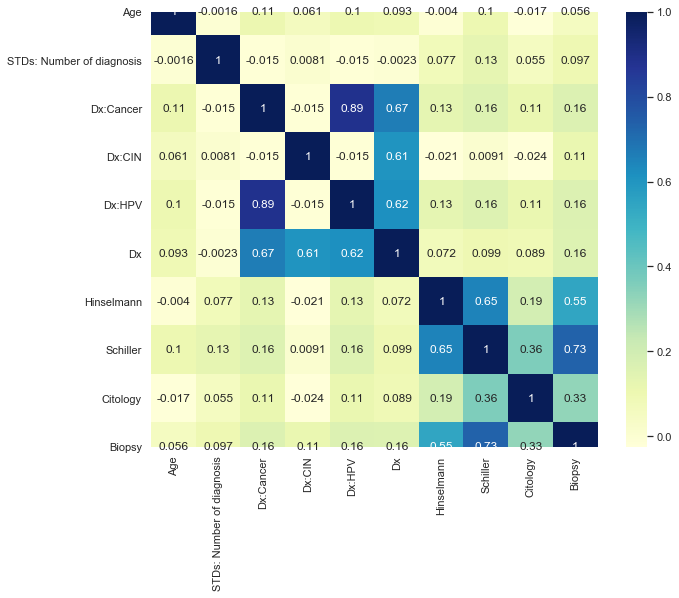

10


In [8]:
# list the heatmap of top correlation
sns.set()

plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True,cmap='YlGnBu')
plt.show()

# number of variables for heatmap


print(len(cor.index))

#### observation:
    

From the above figure, it can be observed that the columns Dx:HPV and Dx are strongly correlated to cancer.

### 1.7 Imputing the missing values from the given dataset?

In [9]:
df.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [10]:
df['First sexual intercourse'].head()

0    15.0
1    14.0
2     NaN
3    16.0
4    21.0
Name: First sexual intercourse, dtype: object

## we will impute the categorical variables with 0 or 1 and continuous variables with median value

In [11]:
# The below code can be used to remove outliers in a categorical column
# def replace_with_iqr:
# col_name = 
# q1 = data[col_name].quantile(q=0.25)
# q3 = data[col_name].quantile(q=0.75)

# iqr = q3 - q1
# upper_limit = q3 + 1.5*iqr
# lower_limit = q1 - 1.5*iqr

# data.apply(lambda x: x if ((x>=lower_limit) & (x<=upper_limit)))

In [12]:
def fill_col(col_name,val):
    print(df[[col_name]].isna().sum())
    df[col_name].fillna(val,inplace=True)
    print(df[[col_name]].isna().sum())
    
def define_col(col_name,n=10):
    print(df[col_name].head(n),'\n\n')
    print(df[col_name].describe(),'\n\n')
    print(df[col_name].value_counts().sort_index(),'\n\n')

In [13]:
col_name = "First sexual intercourse"
define_col(col_name)

0    15.0
1    14.0
2     NaN
3    16.0
4    21.0
5    23.0
6    17.0
7    26.0
8    20.0
9    15.0
Name: First sexual intercourse, dtype: object 


count      851
unique      21
top       15.0
freq       163
Name: First sexual intercourse, dtype: object 


10.0      2
11.0      2
12.0      6
13.0     25
14.0     79
15.0    163
16.0    121
17.0    151
18.0    137
19.0     60
20.0     37
21.0     20
22.0      9
23.0      9
24.0      6
25.0      2
26.0      7
27.0      6
28.0      3
29.0      5
32.0      1
Name: First sexual intercourse, dtype: int64 




In [14]:
fill_col(col_name,mode(df[col_name]))

First sexual intercourse    7
dtype: int64
First sexual intercourse    0
dtype: int64


In [16]:
# Imputing the missing values from Num of pregnancies
col_name = 'Num of pregnancies'
print(df[[col_name]].isna().sum())
df[col_name].fillna(0,inplace=True)
print(df[[col_name]].isna().sum())

Num of pregnancies    56
dtype: int64
Num of pregnancies    0
dtype: int64


In [17]:
# Imputing the missing values from Smokes
print(df['Smokes'])

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: Smokes, Length: 858, dtype: object


In [18]:
fill_col('Smokes',mode(df['Smokes']))

Smokes    13
dtype: int64
Smokes    0
dtype: int64


In [19]:
# Imputing the missing values from Smokes (years)
df['Smokes (years)'].value_counts()

0.0            722
1.266972909     15
9.0              9
5.0              9
1.0              8
2.0              7
3.0              7
7.0              6
8.0              6
16.0             6
11.0             5
4.0              5
10.0             5
15.0             4
6.0              4
14.0             4
0.5              3
19.0             3
13.0             3
12.0             3
22.0             2
18.0             1
0.16             1
20.0             1
21.0             1
32.0             1
24.0             1
37.0             1
28.0             1
34.0             1
Name: Smokes (years), dtype: int64

In [20]:
fill_col('Smokes',mode(df['Smokes (years)']))

Smokes    0
dtype: int64
Smokes    0
dtype: int64


In [21]:
# Imputing the missing values from Smokes (packs/year)
define_col('Smokes (packs/year)')

0     0.0
1     0.0
2     0.0
3    37.0
4     0.0
5     0.0
6     3.4
7     0.0
8     0.0
9     2.8
Name: Smokes (packs/year), dtype: object 


count     845
unique     62
top       0.0
freq      722
Name: Smokes (packs/year), dtype: object 


0.0      722
0.001      1
0.003      1
0.025      1
0.04       2
        ... 
7.0        2
7.5        1
7.6        1
8.0        2
9.0        2
Name: Smokes (packs/year), Length: 62, dtype: int64 




In [22]:
col_name = 'Smokes (packs/year)'
fill_col(col_name,mode(df[col_name]))

Smokes (packs/year)    13
dtype: int64
Smokes (packs/year)    0
dtype: int64


In [23]:
# Imputing the missing values from Hormonal Contraceptives
col_name = 'Hormonal Contraceptives'
define_col(col_name)

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
5    0.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: Hormonal Contraceptives, dtype: object 


count     750
unique      2
top       1.0
freq      481
Name: Hormonal Contraceptives, dtype: object 


0.0    269
1.0    481
Name: Hormonal Contraceptives, dtype: int64 




In [24]:
fill_col(col_name,mode(df[col_name]))

Hormonal Contraceptives    108
dtype: int64
Hormonal Contraceptives    0
dtype: int64


In [25]:
# Imputing the missing values from Hormonal Contraceptives (years)
col_name = 'Hormonal Contraceptives (years)'
define_col(col_name)

0     0.0
1     0.0
2     0.0
3     3.0
4    15.0
5     0.0
6     0.0
7     2.0
8     0.0
9     0.0
Name: Hormonal Contraceptives (years), dtype: object 


count     750
unique     40
top       0.0
freq      269
Name: Hormonal Contraceptives (years), dtype: object 


0.0            269
0.08            25
0.16            16
0.17             1
0.25            41
0.33             9
0.41             1
0.42             8
0.5             25
0.58             6
0.66             6
0.67             2
0.75             7
1.0             77
1.5              3
10.0            11
11.0             2
12.0             4
13.0             2
14.0             2
15.0             6
16.0             2
17.0             1
19.0             2
2.0             40
2.282200521      2
2.5              1
20.0             4
22.0             1
3.0             39
3.5              1
30.0             1
4.0             22
4.5              1
5.0             34
6.0             24
6.5              1
7.0             21
8.0       

In [26]:
fill_col(col_name,mode(df[col_name]))

Hormonal Contraceptives (years)    108
dtype: int64
Hormonal Contraceptives (years)    0
dtype: int64


In [27]:
# Imputing the missing values from IUD
col_name = 'IUD'
define_col(col_name)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
7    1.0
8    0.0
9    NaN
Name: IUD, dtype: object 


count     741
unique      2
top       0.0
freq      658
Name: IUD, dtype: object 


0.0    658
1.0     83
Name: IUD, dtype: int64 




In [28]:
fill_col(col_name,mode(df[col_name]))

IUD    117
dtype: int64
IUD    0
dtype: int64


#### Similary, for the below values we can impute based on whether it is a category or numeric value.

In [29]:
# Imputing the missing values from IUD (years)



In [30]:
# Imputing the missing values from STDs



In [31]:
# Imputing the missing values from STDs (number)



In [32]:
# Imputing the missing values from STDs:condylomatosis



In [33]:
# Imputing the missing values from STDs:cervical condylomatosis



In [34]:
# Imputing the missing values from STDs:vaginal condylomatosis



In [35]:
# Imputing the missing values from STDs:vulvo-perineal condylomatosis



In [36]:
# Imputing the missing values from STDs:syphilis



In [37]:
# Imputing the missing values from STDs:pelvic inflammatory diseases



In [38]:
# Imputing the missing values from STDs:genital herpes



In [39]:
# Imputing the missing values from STDs:molluscum contagiosum


In [40]:
# Imputing the missing values from STDs:AIDS



In [41]:
# Imputing the missing values from STDs:HIV


In [42]:
# Imputing the missing values from STDs:Hepatitis B


In [43]:
# Imputing the missing values from STDs:HPV



In [44]:
# Imputing the missing values from STDs: Time since first diagnosis



In [45]:
# Imputing the missing values from STDs: Time since last diagnosis



###  1.8 Imputing null values for categorical variables for get_dummies

In [46]:
col_name = 'IUD'

df1 = pd.get_dummies(df[col_name],drop_first=True,dummy_na=True,prefix=col_name)
df[df1.columns.values] = df1

In [47]:
len(df.columns)

38

### 1.10 Data Visualization for checking any categorical variables or not using count plot?

In [48]:
df['First sexual intercourse'].describe()

count      858
unique      21
top       15.0
freq       170
Name: First sexual intercourse, dtype: object

In [56]:
fsi = df['First sexual intercourse'].sort_values()
fsi

147    10.0
467    10.0
96     11.0
410    11.0
111    12.0
       ... 
607    29.0
500    29.0
681    29.0
128    29.0
89     32.0
Name: First sexual intercourse, Length: 858, dtype: object

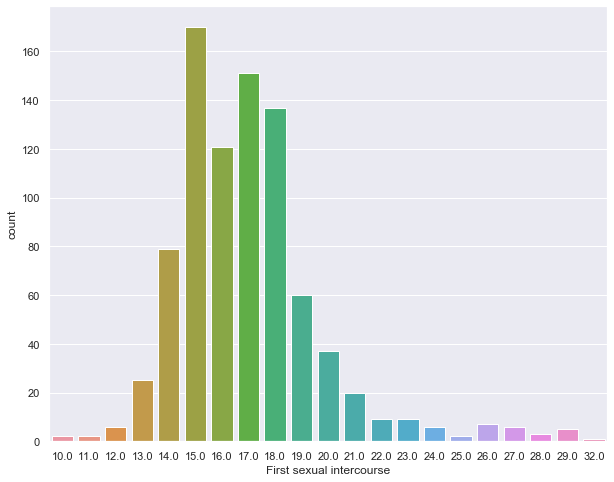

In [50]:
plt.figure(figsize=(10,8)) 
sns.countplot(df['First sexual intercourse'].sort_values())

### 1.11 splitting the dataset into dependent and independent variables?

In [51]:
len(df.columns)

38

In [52]:
y = df['Dx:Cancer']
X = df.drop('Dx:Cancer',axis=1)
len(X.columns)

37

### 1.12 splitting the dataset into  training and test set?

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

# The End